# Capstone Project - The Battle of the Neighbourhoods (Week 1/ 2) -Final Version
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

### Possible Covıid 19 Spreate Analysis of  Attractions & Restaurants & Cafés & Pubs

### Introduction: Business Problem <a name="introduction"></a>

#### Description & Disscusion of the Background

COVID - 19 has made a huge impact on the daily life. There were several restrictions on daily life but the UK government ease down some restriction so people can socialize and business can reopen again.

It seems that people prefer to socialize in open spaces of their boroughs to prevent any infection cause by commuting. They are supply all they needs from local stores but the UK goverment ıs planning to open restaurants & cafés & pubs ın a short time and people are starting to go these places. It means that these socializing events might effect spread of virus. Especially, indoor environments, like pubs and restaurants, have huge potential to spread of germs. All these events might end with a second peak of the virus.

The idea of this study is ;

* To show people risky places in their boroughs so they can take their safety actions beforehand if they want to go to those places.
* To show restaurants & cafés & pubs how risky they are.By using this study, they can take safety actions and change their business model or service beforehand without losing their popularity and income. 


### Data <a name="data"></a>

Based on definition of our problem , I'll be combining ; 
* <b>London's Land Area and Population Density, Ward and Borough</b> that contains density with all 
* <b>List of London Boroughs</b> that contains borough information.
* <b>Foursquare API </b> to collect find the lıst of popular in London.


Following data sources will be needed to extract/generate the required information:
* <b>London's Land Area and Population Density, Ward and Borough data is publicly available at this website:</b> https://data.london.gov.uk/download/land-area-and-population-density-ward-and-borough/77e9257d-ad9d-47aa-aeed-59a00741f301/housing-density-borough.csv

* <b>List of London Boroughs : </b> https://en.wikipedia.org/wiki/List_of_London_boroughs
* <b>Popular locations : </b> Foursquare API 



#### List of London Boroughs

Wikipedia web page which has the main details Borough, Latitude and Longitude informations of the city.Let's download the the list and convert it into dataframe

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from IPython.display import display_html
import numpy as np
import wget
import folium
from geopy.geocoders import Nominatim
from dms2dec.dms_convert import dms2dec
import json
from pandas.io.json import json_normalize 
from sklearn.cluster import KMeans

In [2]:
pip install dms2dec

Note: you may need to restart the kernel to use updated packages.


### Methodology <a name="methodology"></a>

In this project we will direct our efforts on detecting areas of London that have high density, 

In first step we will collect, clean  **London Borough List**  and show the boroughs on a folium map.

Second step in our analysis will be combine with **London's Land Area and Population Density, Ward and Borough** and we will use  **heatmap** to show borough density vusially.

In third and final step we will get the attractions & restaurants & cafés & pubs data from **Forusquare API** and mark the locations on our **heatmap**

In [3]:
website_url = requests.get("https://en.wikipedia.org/wiki/List_of_London_boroughs").text
soup=BeautifulSoup(website_url,'lxml')
print(soup.title)
tab = str(soup.table)
display_html(str(soup.table),raw=True)

<title>List of London boroughs - Wikipedia</title>


Borough
 
 Inner
 
 Status
 
 Local authority
 
 Political control
 
 Headquarters
 
 Area (sq mi)
 
 Population (2013 est) [1] 
 
 Co-ordinates
 
 Nr. in map 
 
 
 Barking and Dagenham [note 1] 
 
 
 
 
 
 Barking and Dagenham London Borough Council 
 
 Labour 
 
 Town Hall , 1 Town Square
 
 13.93
 
 194,352
 
 51°33′39″N 0°09′21″E ﻿ / ﻿ 51.5607°N 0.1557°E ﻿ / 51.5607; 0.1557 ﻿ ( Barking and Dagenham ) 
 
 25
 
 
 Barnet 
 
 
 
 
 
 Barnet London Borough Council 
 
 Conservative 
 
 Barnet House , 2 Bristol Avenue, Colindale
 
 33.49
 
 369,088
 
 51°37′31″N 0°09′06″W ﻿ / ﻿ 51.6252°N 0.1517°W ﻿ / 51.6252; -0.1517 ﻿ ( Barnet ) 
 
 31
 
 
 Bexley 
 
 
 
 
 
 Bexley London Borough Council 
 
 Conservative 
 
 Civic Offices , 2 Watling Street
 
 23.38
 
 236,687
 
 51°27′18″N 0°09′02″E ﻿ / ﻿ 51.4549°N 0.1505°E ﻿ / 51.4549; 0.1505 ﻿ ( Bexley ) 
 
 23
 
 
 Brent 
 
 
 
 
 
 Brent London Borough Council 
 
 Labour 
 
 Brent Civic Centre , Engineers Way
 
 16.70
 
 317,264
 
 51°33′32″N 0°16′54″W ﻿ / ﻿ 51.5588°N 0.2817°W ﻿ / 51.5588; -0.2817 ﻿ ( Brent ) 
 
 12
 
 
 Bromley 
 
 
 
 
 
 Bromley London Borough Council 
 
 Conservative 
 
 Civic Centre , Stockwell Close
 
 57.97
 
 317,899
 
 51°24′14″N 0°01′11″E ﻿ / ﻿ 51.4039°N 0.0198°E ﻿ / 51.4039; 0.0198 ﻿ ( Bromley ) 
 
 20
 
 
 Camden 
 
 Y 
 
 
 
 Camden London Borough Council 
 
 Labour 
 
 Camden Town Hall , Judd Street
 
 8.40
 
 229,719
 
 51°31′44″N 0°07′32″W ﻿ / ﻿ 51.5290°N 0.1255°W ﻿ / 51.5290; -0.1255 ﻿ ( Camden ) 
 
 11
 
 
 Croydon 
 
 
 
 
 
 Croydon London Borough Council 
 
 Labour 
 
 Bernard Weatherill House , Mint Walk
 
 33.41
 
 372,752
 
 51°22′17″N 0°05′52″W ﻿ / ﻿ 51.3714°N 0.0977°W ﻿ / 51.3714; -0.0977 ﻿ ( Croydon ) 
 
 19
 
 
 Ealing 
 
 
 
 
 
 Ealing London Borough Council 
 
 Labour 
 
 Perceval House , 14-16 Uxbridge Road
 
 21.44
 
 342,494
 
 51°30′47″N 0°18′32″W ﻿ / ﻿ 51.5130°N 0.3089°W ﻿ / 51.5130; -0.3089 ﻿ ( Ealing ) 
 
 13
 
 
 Enfield 
 
 
 
 
 
 Enfield London Borough Council 
 
 Labour 
 
 Civic Centre , Silver Street
 
 31.74
 
 320,524
 
 51°39′14″N 0°04′48″W ﻿ / ﻿ 51.6538°N 0.0799°W ﻿ / 51.6538; -0.0799 ﻿ ( Enfield ) 
 
 30
 
 
 Greenwich [note 2] 
 
 Y [note 3] 
 
 Royal 
 
 Greenwich London Borough Council 
 
 Labour 
 
 Woolwich Town Hall , Wellington Street
 
 18.28
 
 264,008
 
 51°29′21″N 0°03′53″E ﻿ / ﻿ 51.4892°N 0.0648°E ﻿ / 51.4892; 0.0648 ﻿ ( Greenwich ) 
 
 22
 
 
 Hackney 
 
 Y 
 
 
 
 Hackney London Borough Council 
 
 Labour 
 
 Hackney Town Hall , Mare Street
 
 7.36
 
 257,379
 
 51°32′42″N 0°03′19″W ﻿ / ﻿ 51.5450°N 0.0553°W ﻿ / 51.5450; -0.0553 ﻿ ( Hackney ) 
 
 9
 
 
 Hammersmith and Fulham [note 4] 
 
 Y 
 
 
 
 Hammersmith and Fulham London Borough Council 
 
 Labour 
 
 Town Hall , King Street
 
 6.33
 
 178,685
 
 51°29′34″N 0°14′02″W ﻿ / ﻿ 51.4927°N 0.2339°W ﻿ / 51.4927; -0.2339 ﻿ ( Hammersmith and Fulham ) 
 
 4
 
 
 Haringey 
 
 [note 3] 
 
 
 
 Haringey London Borough Council 
 
 Labour 
 
 Civic Centre , High Road
 
 11.42
 
 263,386
 
 51°36′00″N 0°06′43″W ﻿ / ﻿ 51.6000°N 0.1119°W ﻿ / 51.6000; -0.1119 ﻿ ( Haringey ) 
 
 29
 
 
 Harrow 
 
 
 
 
 
 Harrow London Borough Council 
 
 Labour 
 
 Civic Centre , Station Road
 
 19.49
 
 243,372
 
 51°35′23″N 0°20′05″W ﻿ / ﻿ 51.5898°N 0.3346°W ﻿ / 51.5898; -0.3346 ﻿ ( Harrow ) 
 
 32
 
 
 Havering 
 
 
 
 
 
 Havering London Borough Council 
 
 Conservative (council NOC )
 
 Town Hall , Main Road
 
 43.35
 
 242,080
 
 51°34′52″N 0°11′01″E ﻿ / ﻿ 51.5812°N 0.1837°E ﻿ / 51.5812; 0.1837 ﻿ ( Havering ) 
 
 24
 
 
 Hillingdon 
 
 
 
 
 
 Hillingdon London Borough Council 
 
 Conservative 
 
 Civic Centre , High Street
 
 44.67
 
 286,806
 
 51°32′39″N 0°28′34″W ﻿ / ﻿ 51.5441°N 0.4760°W ﻿ / 51.5441; -0.4760 ﻿ ( Hillingdon ) 
 
 33
 
 
 Hounslow 
 
 
 
 
 
 Hounslow London Borough Council 
 
 Labour 
 
 Hounslow House , 7 Bath Road
 
 21.61
 
 262,407
 
 51°28′29″N 0°22′05″W ﻿ / ﻿ 51.4746°N 0.3680°W ﻿ / 51.4746; -0.3680 ﻿ ( Hounslow ) 
 
 14
 
 
 Islington 
 
 Y 
 
 
 
 Islington

In [4]:
dfs = pd.read_html(tab)
df=dfs[0]
df.head()

Borough Inner Status  \
0  Barking and Dagenham [note 1]   NaN    NaN   
1                         Barnet   NaN    NaN   
2                         Bexley   NaN    NaN   
3                          Brent   NaN    NaN   
4                        Bromley   NaN    NaN   

                               Local authority Political control  \
0  Barking and Dagenham London Borough Council            Labour   
1                Barnet London Borough Council      Conservative   
2                Bexley London Borough Council      Conservative   
3                 Brent London Borough Council            Labour   
4               Bromley London Borough Council      Conservative   

                                Headquarters  Area (sq mi)  \
0                   Town Hall, 1 Town Square         13.93   
1  Barnet House, 2 Bristol Avenue, Colindale         33.49   
2            Civic Offices, 2 Watling Street         23.38   
3          Brent Civic Centre, Engineers Way         16.70   
4              Civic Centre, Stockwell Close         57.97   

   Population (2013 est)[1]                                 Co-ordinates  \
0                    194352  51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E   
1                    369088  51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W   
2                    236687  51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E   
3                    317264  51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W   
4                    317899  51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E   

   Nr. in map  
0          25  
1          31  
2          23  
3          12  
4          20

In [5]:
# Data cleaning 
df=df.replace({'Barking and Dagenham [note 1]':'Barking and Dagenham','Greenwich [note 2]':'Greenwich','Hammersmith and Fulham [note 4]':'Hammersmith and Fulham'})
df[['Coor_1','Coor_2']] = df['Co-ordinates'].str.split("/", expand=True)
df_1 = df.filter(['Borough','Area (sq mi)','Population (2013 est)[1]','Coor_1'])
df_1[['Coor_2','Coor_3','x']] = df['Coor_1'].str.split(" ", expand=True)
df_2 = df_1.filter(['Borough','Area (sq mi)','Population (2013 est)[1]','Coor_2','Coor_3'])
df_2.head()

Borough  Area (sq mi)  Population (2013 est)[1]      Coor_2  \
0  Barking and Dagenham         13.93                    194352  51°33′39″N   
1                Barnet         33.49                    369088  51°37′31″N   
2                Bexley         23.38                    236687  51°27′18″N   
3                 Brent         16.70                    317264  51°33′32″N   
4               Bromley         57.97                    317899  51°24′14″N   

       Coor_3  
0  0°09′21″E﻿  
1  0°09′06″W﻿  
2  0°09′02″E﻿  
3  0°16′54″W﻿  
4  0°01′11″E﻿

I used <b>dms2dec </b> function to convert DMS format into Lattitude Longtitude.

In [6]:
result = [] 
for value in df_2["Coor_2"]: 
    result.append(dms2dec(value))
       
df_2["Lat"] = result    

result_2 = [] 
for value in df_2["Coor_3"]: 
    result_2.append(dms2dec(value))
       
df_2["Long"] = result_2    
df_2.head()

Borough  Area (sq mi)  Population (2013 est)[1]      Coor_2  \
0  Barking and Dagenham         13.93                    194352  51°33′39″N   
1                Barnet         33.49                    369088  51°37′31″N   
2                Bexley         23.38                    236687  51°27′18″N   
3                 Brent         16.70                    317264  51°33′32″N   
4               Bromley         57.97                    317899  51°24′14″N   

       Coor_3        Lat      Long  
0  0°09′21″E﻿  51.560833  0.155833  
1  0°09′06″W﻿  51.625278 -0.151667  
2  0°09′02″E﻿  51.455000  0.150556  
3  0°16′54″W﻿  51.558889 -0.281667  
4  0°01′11″E﻿  51.403889  0.019722

In [7]:
df_3=df_2.filter(['Borough','Area (sq mi)','Population (2013 est)[1]','Lat','Long'])
df_3.head()

Borough  Area (sq mi)  Population (2013 est)[1]        Lat  \
0  Barking and Dagenham         13.93                    194352  51.560833   
1                Barnet         33.49                    369088  51.625278   
2                Bexley         23.38                    236687  51.455000   
3                 Brent         16.70                    317264  51.558889   
4               Bromley         57.97                    317899  51.403889   

       Long  
0  0.155833  
1 -0.151667  
2  0.150556  
3 -0.281667  
4  0.019722

I used python folium library to visualize geographic details of London and its boroughs and I created a map of London with boroughs superimposed on top. I used latitude and longitude values to get the visual as below:

In [8]:
address = 'London, UK'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 51.5073219, -0.1276474.


In [9]:
map_london = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, name in zip(df_3['Lat'], df_3['Long'], df_3['Borough']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='Blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.5,
        parse_html=False).add_to(map_london)  
    
map_london

The data from Wikipedia has 2013 Population estimamtion but I need 2020 figures. So, let's download another data from London Datastore ana combine them to get latest population density.

In [10]:
website_url = ("https://data.london.gov.uk/download/land-area-and-population-density-ward-and-borough/77e9257d-ad9d-47aa-aeed-59a00741f301/housing-density-borough.csv")
london_data=wget.download(website_url)
df_pop= pd.read_csv(london_data)
df_pop.head()

Code            Name  Year   Source  Population  \
0  E09000001  City of London  1999  ONS MYE        6581   
1  E09000001  City of London  2000  ONS MYE        7014   
2  E09000001  City of London  2001  ONS MYE        7359   
3  E09000001  City of London  2002  ONS MYE        7280   
4  E09000001  City of London  2003  ONS MYE        7115   

   Inland_Area _Hectares  Total_Area_Hectares  Population_per_hectare  \
0                  290.4                314.9                    22.7   
1                  290.4                314.9                    24.2   
2                  290.4                314.9                    25.3   
3                  290.4                314.9                    25.1   
4                  290.4                314.9                    24.5   

   Square_Kilometres  Population_per_square_kilometre  
0                2.9                           2266.2  
1                2.9                           2415.3  
2                2.9                           2534.1  
3                2.9                           2506.9  
4                2.9                           2450.1

The data from London Data Store has data from two differnet sourde and from 1999 to 2050.Let's limit our data  to get 2020 numbers.

In [11]:
df_pop1 = df_pop[df_pop.Year == 2020]
df_pop1['Source'].value_counts()

GLA Population Projections    36
Name: Source, dtype: int64

Let's limit our new data and combine with previous one the get final version

In [12]:
df_pop2 = df_pop1.filter(['Name','Population_per_square_kilometre'])
df_pop2 = df_pop2.rename(columns={'Name': 'Borough'})
df_4 = df_3.merge(df_pop2,on='Borough')
df_5 =df_4.filter(['Borough','Lat','Long','Population_per_square_kilometre'])
df_5 = df_5.rename(columns={'Population_per_square_kilometre': 'Population_Per_km2_Borough_2020'})
df_5.head()

Borough        Lat      Long  Population_Per_km2_Borough_2020
0  Barking and Dagenham  51.560833  0.155833                           6047.6
1                Barnet  51.625278 -0.151667                           4693.4
2                Bexley  51.455000  0.150556                           4208.8
3                 Brent  51.558889 -0.281667                           7953.6
4               Bromley  51.403889  0.019722                           2240.6

Let's use <b> london_boroughs.geojson </b> data to create choropleth map to show density of boroughs.

In [13]:
with open("london_boroughs.geojson") as datafile:
    data = json.load(datafile)

In [14]:
map_london_2 = folium.Map(location=[latitude, longitude], zoom_start=10)

In [15]:
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
map_london_2.choropleth(
    geo_data=data,
    data=df_5,
    columns=['Borough', 'Population_Per_km2_Borough_2020'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Population_Per_km2_Borough_2020'
)

# display map
map_london_2

#### Foursquare
Now that we have our borough locations, let's use Foursquare API to get info of the popula places in each borough

In [16]:
CLIENT_ID = 'LJ40CGIWAOPYI5V1MQC4IV5ZOD5UF5ZGQYYIUVQATWAZISA4' 
CLIENT_SECRET = 'TYL0RYGHIGYNEO51OWWXR3EQJ1NN0HDBY45KQPLN4UY30KZV' 
VERSION = '20180605' 

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: LJ40CGIWAOPYI5V1MQC4IV5ZOD5UF5ZGQYYIUVQATWAZISA4
CLIENT_SECRET:TYL0RYGHIGYNEO51OWWXR3EQJ1NN0HDBY45KQPLN4UY30KZV


In [17]:
LIMIT = 320 # limit of number of venues returned by Foursquare API
radius = 750 # define radius
neighborhood_latitude = 51.5073219
neighborhood_longitude = -0.1276474

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url 

'https://api.foursquare.com/v2/venues/explore?&client_id=LJ40CGIWAOPYI5V1MQC4IV5ZOD5UF5ZGQYYIUVQATWAZISA4&client_secret=TYL0RYGHIGYNEO51OWWXR3EQJ1NN0HDBY45KQPLN4UY30KZV&v=20180605&ll=51.5073219,-0.1276474&radius=750&limit=320'

In [18]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5edece681835dd001b37c627'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Westminster',
  'headerFullLocation': 'Westminster, London',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 112,
  'suggestedBounds': {'ne': {'lat': 51.514071906750004,
    'lng': -0.11682277685178516},
   'sw': {'lat': 51.50057189325, 'lng': -0.13847202314821483}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ac518cdf964a520e6a520e3',
       'name': 'National Gallery',
       'location': {'address': 'Trafalgar Sq',
        'lat': 51.50887601013219,
        'lng': -0.1284778118133545,
        'labeledLatLngs': [{'label': 'display',
          'lat': 

#### Explore Boroughs  in London

In [19]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [20]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues)

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

name   categories        lat       lng
0                National Gallery   Art Museum  51.508876 -0.128478
1                Trafalgar Square        Plaza  51.507987 -0.128048
2  East Trafalgar Square Fountain     Fountain  51.508088 -0.127700
3                 Corinthia Hotel        Hotel  51.506607 -0.124460
4       National Portrait Gallery  Art Gallery  51.509438 -0.128032

In [21]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


In [22]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [23]:
london_venues = getNearbyVenues(names=df_5['Borough'],
                                   latitudes=df_5['Lat'],
                                   longitudes=df_5['Long']
                                  )

Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster


In [24]:
print(london_venues.shape)
london_venues.head()

(1443, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Barking and Dagenham              51.560833                0.155833   
1  Barking and Dagenham              51.560833                0.155833   
2  Barking and Dagenham              51.560833                0.155833   
3  Barking and Dagenham              51.560833                0.155833   
4  Barking and Dagenham              51.560833                0.155833   

                             Venue  Venue Latitude  Venue Longitude  \
0                     Central Park       51.559560         0.161981   
1      Crowlands Heath Golf Course       51.562457         0.155818   
2      Robert Clack Leisure Centre       51.560808         0.152704   
3  Beacontree Heath Leisure Centre       51.560997         0.148932   
4      Becontree Heath Bus Station       51.561065         0.150998   

         Venue Category  
0                  Park  
1           Golf Course  
2     Martial Arts Dojo  
3  Gym / Fitness Center  
4           Bus Station

I added top locations to show in choropleth map .

###  Analyze Each Neighborhood


In [25]:
london_onehot = pd.get_dummies(london_venues[['Venue']], prefix="", prefix_sep="")

london_onehot['Neighborhood'] = london_venues['Neighborhood'] 

fixed_columns = [london_onehot.columns[-1]] + list(london_onehot.columns[:-1])
london_onehot = london_onehot[fixed_columns]

london_onehot.head()

Neighborhood  "Out of Order" David Mach Sculpture (Phoneboxes)  \
0  Barking and Dagenham                                                 0   
1  Barking and Dagenham                                                 0   
2  Barking and Dagenham                                                 0   
3  Barking and Dagenham                                                 0   
4  Barking and Dagenham                                                 0   

   1Rebel Victoria  41 Hotel  49 Cafe  7000 Jars Of Beer  @ Thai Canteen  \
0                0         0        0                  0               0   
1                0         0        0                  0               0   
2                0         0        0                  0               0   
3                0         0        0                  0               0   
4                0         0        0                  0               0   

   ASK Italian  Ada  Adidas  ...  hmv  hub London Westminster Abbey  \
0            0    0       0  ...    0                             0   
1            0    0       0  ...    0                             0   
2            0    0       0  ...    0                             0   
3            0    0       0  ...    0                             0   
4            0    0       0  ...    0                             0   

   ibis London Docklands Canary Wharf  intu Uxbridge  itsu  \
0                                   0              0     0   
1                                   0              0     0   
2                                   0              0     0   
3                                   0              0     0   
4                                   0              0     0   

   more Bar And Brasserie  treatz dessert parlour  truGym  wagamama  wilko  
0                       0                       0       0         0      0  
1                       0                       0       0         0      0  
2                       0                       0       0         0      0  
3                       0                       0       0         0      0  
4                       0                       0       0         0      0  

[5 rows x 1045 columns]

In [26]:
london_onehot.shape

(1443, 1045)

In [27]:
london_grouped = london_onehot.groupby('Neighborhood').mean().reset_index()
london_grouped

Neighborhood  "Out of Order" David Mach Sculpture (Phoneboxes)  \
0     Barking and Dagenham                                              0.00   
1                   Barnet                                              0.00   
2                   Bexley                                              0.00   
3                    Brent                                              0.00   
4                  Bromley                                              0.00   
5                   Camden                                              0.00   
6                  Croydon                                              0.00   
7                   Ealing                                              0.00   
8                  Enfield                                              0.00   
9                Greenwich                                              0.00   
10                 Hackney                                              0.00   
11  Hammersmith and Fulham                                              0.00   
12                Haringey                                              0.00   
13                  Harrow                                              0.00   
14                Havering                                              0.00   
15              Hillingdon                                              0.00   
16                Hounslow                                              0.00   
17               Islington                                              0.00   
18  Kensington and Chelsea                                              0.00   
19    Kingston upon Thames                                              0.01   
20                 Lambeth                                              0.00   
21                Lewisham                                              0.00   
22                  Merton                                              0.00   
23                  Newham                                              0.00   
24               Redbridge                                              0.00   
25    Richmond upon Thames                                              0.00   
26               Southwark                                              0.00   
27                  Sutton                                              0.00   
28           Tower Hamlets                                              0.00   
29          Waltham Forest                                              0.00   
30              Wandsworth                                              0.00   
31             Westminster                                              0.00   

    1Rebel Victoria  41 Hotel   49 Cafe  7000 Jars Of Beer  @ Thai Canteen  \
0          0.000000  0.000000  0.000000               0.00        0.000000   
1          0.000000  0.000000  0.000000               0.00        0.000000   
2          0.000000  0.000000  0.000000               0.00        0.000000   
3          0.000000  0.000000  0.000000               0.00        0.000000   
4          0.000000  0.000000  0.000000               0.00        0.000000   
5          0.000000  0.000000  0.013699               0.00        0.000000   
6          0.000000  0.000000  0.000000               0.00        0.000000   
7          0.000000  0.000000  0.000000               0.00        0.014085   
8          0.000000  0.000000  0.000000               0.00        0.000000   
9          0.000000  0.000000  0.000000               0.00        0.000000   
10         0.000000  0.000000  0.000000               0.00        0.000000   
11         0.000000  0.000000  0.000000               0.00        0.000000   
12         0.000000  0.000000  0.000000               0.00        0.000000   
13         0.000000  0.000000  0.000000               0.00        0.000000   
14         0.000000  0.000000  0.000000               0.00        0.000000   
15         0.000000  0.000000  0.000000               0.00        0.000000   
16         0.000000  0.000000  0.000000        

In [28]:
num_top_venues = 5

for hood in london_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = london_grouped[london_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barking and Dagenham----
                             venue  freq
0      Crowlands Heath Golf Course  0.17
1           Dagenham Swimming Pool  0.17
2  Beacontree Heath Leisure Centre  0.17
3                     Central Park  0.17
4      Robert Clack Leisure Centre  0.17


----Barnet----
                                              venue  freq
0                            Beaconsfield Road (BF)   0.5
1                                     Oakleigh Cafe   0.5
2  "Out of Order" David Mach Sculpture (Phoneboxes)   0.0
3                                      Runners Need   0.0
4                                          Safestay   0.0


----Bexley----
             venue  freq
0            wilko  0.03
1             Game  0.03
2        Starbucks  0.03
3       McDonald's  0.03
4  Marks & Spencer  0.03


----Brent----
             venue  freq
0        Starbucks  0.04
1     Costa Coffee  0.03
2      New Balance  0.01
3           Prezzo  0.01
4  Currys PC World  0.01


----Bromley----
         

In [29]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [30]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = london_grouped['Neighborhood']

for ind in np.arange(london_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(london_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood            1st Most Common Venue  \
0  Barking and Dagenham  Beacontree Heath Leisure Centre   
1                Barnet           Beaconsfield Road (BF)   
2                Bexley                            wilko   
3                 Brent                        Starbucks   
4               Bromley                       Caffè Nero   

    2nd Most Common Venue 3rd Most Common Venue        4th Most Common Venue  \
0  Dagenham Swimming Pool          Central Park  Crowlands Heath Golf Course   
1           Oakleigh Cafe          Hotel Xanadu               Hotel Chocolat   
2                New Look                  Lidl                 Bella Italia   
3            Costa Coffee                Hilton              Currys PC World   
4            Costa Coffee                 wilko                       UNIQLO   

                       5th Most Common Venue            6th Most Common Venue  \
0                Robert Clack Leisure Centre      Becontree Heath Bus Station   
1  Hackney Central London Overground Station  HMS Belfast (HMS Belfast (C35))   
2                    Bexleyheath Clock Tower       Bexleyheath Marriott Hotel   
3                             The Blue Check                         Bar 1999   
4                              Apple Bromley                             Lush   

  7th Most Common Venue                      8th Most Common Venue  \
0         Hollister Co.  Hackney Central London Overground Station   
1                  HEMA                                        H&M   
2           Twin Palace                                      Boots   
3              Bar 1987                                Olympic Way   
4             O'Neill's                                Waterstones   

      9th Most Common Venue        10th Most Common Venue  
0                      HEMA                           H&M  
1                  GŎNG Bar  Gustoso Ristorante & Enoteca  
2  Broadway Shopping Centre                   Burger King  
3                     Lindt                  PizzaExpress  
4               Cow and Pig                     Five Guys

### Analysis <a name="analysis"></a>

We have some common venue categories in boroughs. In this reason I used unsupervised learning K-means algorithm to cluster the boroughs. K-Means algorithm is one of the most common cluster method of unsupervised learning.

First, I analyze the K-Means with elbow method and it shows that the 4 degree for optimum k of the K-Means.

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans

In [32]:
X = df_5[['Lat', 'Long']].values.astype(float)
y = df_5['Population_Per_km2_Borough_2020'].values.astype(int)

In [33]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

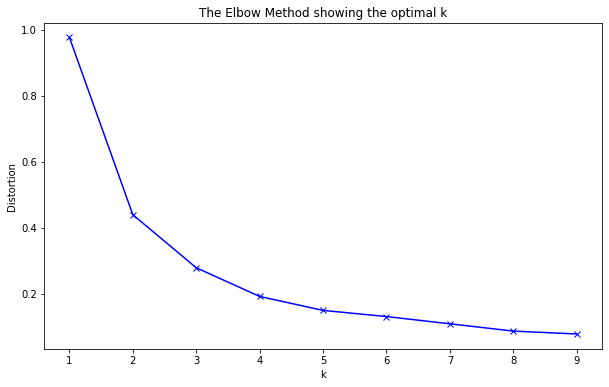

In [34]:
plt.figure(figsize=(10,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [35]:
from sklearn.cluster import KMeans
kclusters = 4
toronto_grouped_clustering = df_5.drop(['Borough'], 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)
kmeans.labels_

array([1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 3, 2, 0, 1, 1, 1, 1, 3, 2, 1, 2, 0,
       1, 0, 1, 1, 2, 1, 3, 0, 0, 2], dtype=int32)

In [36]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [37]:
london_merged = df_5

london_merged = london_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Borough')

london_merged.head()

Borough        Lat      Long  Population_Per_km2_Borough_2020  \
0  Barking and Dagenham  51.560833  0.155833                           6047.6   
1                Barnet  51.625278 -0.151667                           4693.4   
2                Bexley  51.455000  0.150556                           4208.8   
3                 Brent  51.558889 -0.281667                           7953.6   
4               Bromley  51.403889  0.019722                           2240.6   

   Cluster Labels            1st Most Common Venue   2nd Most Common Venue  \
0               1  Beacontree Heath Leisure Centre  Dagenham Swimming Pool   
1               1           Beaconsfield Road (BF)           Oakleigh Cafe   
2               1                            wilko                New Look   
3               0                        Starbucks            Costa Coffee   
4               1                       Caffè Nero            Costa Coffee   

  3rd Most Common Venue        4th Most Common Venue  \
0          Central Park  Crowlands Heath Golf Course   
1          Hotel Xanadu               Hotel Chocolat   
2                  Lidl                 Bella Italia   
3                Hilton              Currys PC World   
4                 wilko                       UNIQLO   

                       5th Most Common Venue            6th Most Common Venue  \
0                Robert Clack Leisure Centre      Becontree Heath Bus Station   
1  Hackney Central London Overground Station  HMS Belfast (HMS Belfast (C35))   
2                    Bexleyheath Clock Tower       Bexleyheath Marriott Hotel   
3                             The Blue Check                         Bar 1999   
4                              Apple Bromley                             Lush   

  7th Most Common Venue                      8th Most Common Venue  \
0         Hollister Co.  Hackney Central London Overground Station   
1                  HEMA                                        H&M   
2           Twin Palace                                      Boots   
3              Bar 1987                                Olympic Way   
4             O'Neill's                                Waterstones   

      9th Most Common Venue        10th Most Common Venue  
0                      HEMA                           H&M  
1                  GŎNG Bar  Gustoso Ristorante & Enoteca  
2  Broadway Shopping Centre                   Burger King  
3                     Lindt                  PizzaExpress  
4               Cow and Pig                     Five Guys

In [39]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [40]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, neighborhood, cluster in zip(london_merged['Lat'],london_merged['Long'],london_merged['Borough'],london_merged['Cluster Labels']):
    label = folium.Popup(str(neighborhood) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_london_2)
       
map_london_2

In [41]:
london_merged.loc[london_merged['Cluster Labels'] == 0, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

Borough 1st Most Common Venue 2nd Most Common Venue  \
3            Brent             Starbucks          Costa Coffee   
12        Haringey         Kebap Delight             black tap   
21        Lewisham          Costa Coffee  La Pizzeria Italiana   
23          Newham               LCY OPS     Holiday Inn Excel   
29  Waltham Forest          Buhler + Co.          Italian Deli   
30      Wandsworth             Starbucks         The East Hill   

            3rd Most Common Venue                 4th Most Common Venue  \
3                          Hilton                       Currys PC World   
12  Arriva London North Bus Depot                                Greggs   
21                          Argos         Catford Railway Station (CTF)   
23              Hampton by Hilton                 London Regatta Centre   
29                  Clapton Craft  Waltham Forest College Swimming Pool   
30                    Brewers Inn                                 CWTCH   

                              5th Most Common Venue  \
3                                    The Blue Check   
12                                  Green Rooms Bar   
21      FLK Chinese Groceries - Chinese Supermarket   
23  London City Airport (LCY) (London City Airport)   
29                  Waltham Forest Feel Good Centre   
30                                      King's Arms   

             6th Most Common Venue   7th Most Common Venue  \
3                         Bar 1999                Bar 1987   
12  Spouter's Corner (Wetherspoon)           Woodside Park   
21                  Catford Centre   Catford Bridge Tavern   
23                LCY Runway 09-27        Departure Lounge   
29       Walthamstow Assembly Hall  William Morris Gallery   
30                        New Look           GAIL's Bakery   

                   8th Most Common Venue  \
3                            Olympic Way   
12                    Crystal Restaurant   
21  Catford Bridge Railway Station (CFB)   
23                  Connaugh House Hotel   
29       William Morris Gallery Tea Room   
30                            Co-op Food   

                         9th Most Common Venue 10th Most Common Venue  
3                                        Lindt           PizzaExpress  
12                                         KFC                Nando's  
21  Catford & Catford Bridge Stations Bus Stop                    KFC  
23               Travelodge London Excel Hotel      Restair Trattoria  
29                        Wynwood art district               The Bell  
30                                    The Thai          Rossopomodoro

In [42]:
london_merged.loc[london_merged['Cluster Labels'] == 1, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

Borough                        1st Most Common Venue  \
0   Barking and Dagenham              Beacontree Heath Leisure Centre   
1                 Barnet                       Beaconsfield Road (BF)   
2                 Bexley                                        wilko   
4                Bromley                                   Caffè Nero   
6                Croydon                                      Nando's   
7                 Ealing                                    Starbucks   
8                Enfield                                    Superdrug   
9              Greenwich                                        wilko   
13                Harrow                                Sam's Chicken   
14              Havering                                 Costa Coffee   
15            Hillingdon                                 Costa Coffee   
16              Hounslow  Hounslow Central London Underground Station   
19  Kingston upon Thames                                 Costa Coffee   
22                Merton                                  Bella Donna   
24             Redbridge                                       Subway   
25  Richmond upon Thames   Bellissimo Ristorante Caffetteria Italiana   
27                Sutton                                       Subway   

            2nd Most Common Venue          3rd Most Common Venue  \
0          Dagenham Swimming Pool                   Central Park   
1                   Oakleigh Cafe                   Hotel Xanadu   
2                        New Look                           Lidl   
4                    Costa Coffee                          wilko   
6                          Sangri               Forbidden Planet   
7                      Caffè Nero                     McDonald's   
8                         Topshop                          Preto   
9                      Travelodge                       New Look   
13                   Costa Coffee  Shree Krishna Vada Pav (SKVP)   
14                         Greggs               The Mercury Mall   
15                          Boots                          wilko   
16              Civic Guest House                   Cafe Venezia   
19                      Starbucks                    Waterstones   
22  Tariro Fairtrade Coffee House                            KFC   
24                         Greggs                           Lidl   
25                            KFC                        The Fox   
27                     Caffè Nero                    Casa Nostra   

          4th Most Common Venue                      5th Most Common Venue  \
0   Crowlands Heath Golf Course                Robert Clack Leisure Centre   
1                Hotel Chocolat  Hackney Central London Overground Station   
2                  Bella Italia                    Bexleyheath Clock Tower   
4                        UNIQLO                              Apple Bromley   
6                 Scrumpchino's                               Thai Express   
7                Piccola Italia                     Haven Green Bus Stop E   
8                      The Stag                                  JD Sports   
9                  M&S Foodhall                                      Argos   
13            Sainsbury's Local                                      Tesco   
14                      Primark                                Burger King   
15                 The Fig Tree                               Bella Italia   
16              The Black Horse             Mimi's Coffee & Dessert Lounge   
19                       Greggs                                 Caffè Nero   
22                        Wimpy                      The Potting Shed Cafe   
24                        wilko                                 Platform 3   
25           Patisserie Valerie                                 Travelodge   
27                         Next                                  O'Neill's   

                               6th Most Common Venue  \
0               

In [43]:
london_merged.loc[london_merged['Cluster Labels'] == 2, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

Borough  1st Most Common Venue 2nd Most Common Venue  \
5                   Camden                Nando's      St. Athans Hotel   
11  Hammersmith and Fulham                  wilko   The Carpenters Arms   
18  Kensington and Chelsea                Melabes    Whole Foods Market   
20                 Lambeth       Electric Brixton        Barrio Brixton   
26               Southwark  More London Riverside          PizzaExpress   
31             Westminster          Pret A Manger              Vagabond   

      3rd Most Common Venue    4th Most Common Venue    5th Most Common Venue  \
5                   Ladurée        Keystone Crescent  Bloomsbury Coffee House   
11        Shilpa Restaurant    Enterprise Rent-A-Car        St Peter's Square   
18   The Design Museum Shop        The Design Museum            Vicarage Gate   
20             Phoenix Café  Restaurante Santafereño             Ritzy Cinema   
26                The Scoop    Brigade Bar & Kitchen           Hotel Chocolat   
31  Victoria Palace Theatre                Laos Cafe        Ravello Coffee Co   

   6th Most Common Venue  7th Most Common Venue 8th Most Common Venue  \
5   Patisserie Deux Amis   Kings Cross Dog Park           Cock Tavern   
11      Steam Restaurant        Drink Me Eat Me      Stonemasons Arms   
18         Virgin Active        Core Collective    Locanda Ottoemezzo   
20      The Wine Parlour       Three Eight Four    Three Little Birds   
26      Hot Yoga Society  The Rose Public House        Honest Burgers   
31           Ole & Steen      Le Pain Quotidien  Flight Club Victoria   

   9th Most Common Venue     10th Most Common Venue  
5        Fortnum & Mason     Fork - Deli Patisserie  
11                Subway                    TK Maxx  
18             Five Guys  Baby Spa by Laura Sevenus  
20          Book Mongers                     Kamome  
26      The Queen's Walk                   Hing Lee  
31      Ibérica Victoria                 Rag & Bone

In [44]:
london_merged.loc[london_merged['Cluster Labels'] == 3, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

Borough        1st Most Common Venue 2nd Most Common Venue  \
10        Hackney                      Iceland   Paper Dress Vintage   
17      Islington               Planet Organic      Raabs The Bakers   
28  Tower Hamlets  Super Three Private Cuisine         Tesco Express   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
10                 Boots                Pidgin  Tonkotsu Mare Street   
17               Amorino            Little Bat        Myddleton Arms   
28    Aspen Way Bus Stop          Costa Coffee       Sichuan Kitchen   

   6th Most Common Venue      7th Most Common Venue  \
10            Travelodge                        Peg   
17             Laki Kane  The Life Centre Islington   
28                  Nisa         Traffic Light Tree   

             8th Most Common Venue      9th Most Common Venue  \
10              Black Sheep Coffee                Patty & Bun   
17                     MEAT Liquor                The Taproom   
28  Blackwall Roundabout Underpass  Datapipe Europe (Support)   

   10th Most Common Venue  
10                  LARDO  
17       Canonbury Square  
28            Poplar Cafe

### Results and Discussion <a name="results"></a>

Our analysis shows that the population density of the London is getting higher rather than outskirts. It means that people who stays in central and business which are based in Central London face with high risk infections. The most popular places can be different, there for this report can be generate on weekly base point out ciricla locations.

On the other hand this, of course, does not imply that those zones are actually optimal locations for a density of boroughs. Purpose of this analysis was to only provide info critical boroughs and places in London. 

List of the popular business should generate new ideas to prevent any kind of spread in terms of safety measures and find new way of services to keep their business keep running.


### Conclusion <a name="conclusion"></a>

As a result, people are turning to their social lifes, their business and start to go to work. For this reason, people can achieve better outcomes by using this outcomes.

Not only for people and business owners but also city councils can generate this report more regularly and keep in control.